# Data Preparation

## Combining Datasets

In [ ]:
# Import packages
import pandas as pd
import numpy as np

# Load datasets (source links in Works Cited of report)
workout_recommendations = pd.read_excel('gym recommendation.xlsx')
gym_details = pd.read_csv('megaGymDataset.csv')

# Rename variables
workout_recommendations["Level"] = workout_recommendations["Level"].replace("Obuse", "Obese")
# Drop unnecessary columns
workout_recommendations = workout_recommendations.drop(["Recommendation", "Diet"], axis = 1)
gym_details = gym_details.drop(["Unnamed: 0", "Rating", "RatingDesc", "Desc"], axis = 1)
# Remove specific unwanted values
vals_to_remove = [
    "HM Running Man Crunch", "Running lunge", "FYR Running Lunge",
    "HM Running Lunge", "Dumbbell walking calf raise", "Walking Butt Kicks",
    "Walking Glute Stretch", "Walking lunge", "30 Legs Walking Lunge",
    "Barbell walking lunge", "Bodyweight Walking Lunge", "Walking lunge with hip extension",
    "Walking lunge with twist", "Bodyweight Walking Lunge - Gethin Variation",
    "HM Walking Hip Stretch", "Dumbbell walking lunge-", 'Dumbbell Walking Lunge', "Walking High Knee"
]

gym_details_filtered = gym_details[gym_details['Title'].isin(vals_to_remove) == False]


In [ ]:
# List to store the new rows
new_rows = []

# Iterate through the indices and rows of the workout recommendations
for index, row in workout_recommendations.iterrows():
    # Replaces and/or with a comma and the converts the exercises into a list separated by commas
    exercises = row['Exercises'].replace(' and ', ', ').replace(' or ', ', ').split(", ")
    # Removes leading and trailing spaces, commas, and periods
    exercises = [exercise.strip(' ,.') for exercise in exercises]

    # Iterate over each exercise and find matches in gym_details based on the title of the workout
    #   (if it contains the word for the exercise in the title)
    for exercise in exercises:
        matches = gym_details_filtered[gym_details_filtered["Title"].str.contains(exercise, case=False, na=False)]

        # For each match, create a new row with relevant details
        for match_index, match_row in matches.iterrows():
            new_row = row.copy()
            # Add the recommended exercise and details from gym_details
            new_row['Recommended Exercise'] = match_row['Title']
            new_row['Type'] = match_row['Type']
            new_row['BodyPart'] = match_row['BodyPart']
            new_row['Equipment'] = match_row['Equipment']
            new_row['Workout Intensity Level'] = match_row['Level']

            # Append this new row to the list of new rows
            new_rows.append(new_row)

# Convert the list of new rows into a DataFrame
new_workout_recommendations = pd.DataFrame(new_rows)

# Drop the list of recommended exercises since we now have a row for each recommendation
new_workout_recommendations = new_workout_recommendations.drop(["Exercises"], axis = 1)

meters_to_inches = 39.3701
kg_to_pounds = 2.20462

# Convert 'Height' from meters to inches and 'Weight' from kg to pounds
new_workout_recommendations['Height_in_inches'] = new_workout_recommendations['Height'] * meters_to_inches
new_workout_recommendations['Weight_in_pounds'] = new_workout_recommendations['Weight'] * kg_to_pounds

new_workout_recommendations = new_workout_recommendations.drop(['Height'], axis = 1)
new_workout_recommendations = new_workout_recommendations.drop(['Weight'], axis = 1)

# Save final dataset to csv
new_workout_recommendations.to_csv('workout_recommendations_new.csv', index=False)


In [ ]:
new_workout_recommendations

,Sex,Age,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Equipment,Recommended Exercise,Type,BodyPart,Workout Intensity Level,Height_in_inches,Weight_in_pounds
0,Male,18,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,Bands,Squats - With Bands,Strength,Quadriceps,Beginner,66.141768,104.71945
1,Male,18,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,Barbell,Jefferson Squats,Strength,Quadriceps,Beginner,66.141768,104.71945
2,Male,18,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,Barbell,Barbell Back Squats,Strength,Quadriceps,Intermediate,66.141768,104.71945
3,Male,18,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,Kettlebells,Front Squats With Two Kettlebells,Strength,Quadriceps,Beginner,66.141768,104.71945
4,Male,18,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,Kettlebells,Goblet Squats,Strength,Quadriceps,Intermediate,66.141768,104.71945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96769,Male,38,No,No,27.69,Overweight,Weight Loss,Cardio Fitness,Body Only,Trail Running/Walking,Cardio,Quadriceps,Intermediate,75.196891,222.66662
96770,Male,39,No,No,27.67,Overweight,Weight Loss,Cardio Fitness,Other,Bicycling,Cardio,Quadriceps,Intermediate,75.590592,224.87124
96771,Male,39,No,No,27.67,Overweight,Weight Loss,Cardio Fitness,Body Only,Swimming,Cardio,Chest,Intermediate,75.590592,224.87124
96772,Male,39,No,No,27.67,Overweight,Weight Loss,Cardio Fitness,Machine,Treadmill running,Cardio,Quadriceps,Intermediate,75.590592,224.87124


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Class Imbalance Analysis

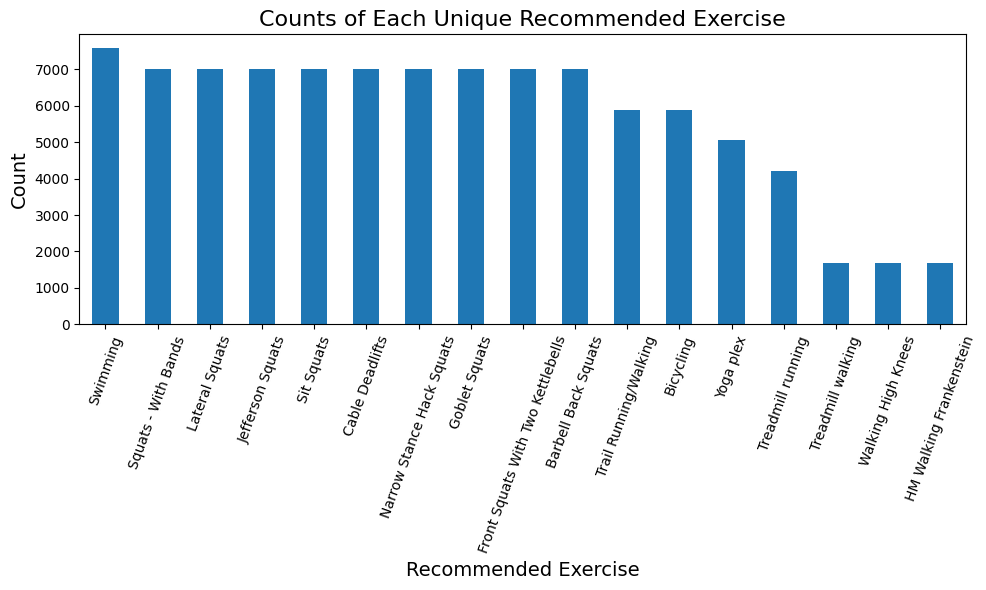

In [ ]:
import matplotlib.pyplot as plt

# Count the number of observations of each exercise
exercise_counts = new_workout_recommendations['Recommended Exercise'].value_counts()

# Create bar plot
plt.figure(figsize=(10,6))
exercise_counts.plot(kind='bar')

# Add labels
plt.title('Counts of Each Unique Recommended Exercise', fontsize=16)
plt.xlabel('Recommended Exercise', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

## Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
# List of categorical (not including recommended excercise)
categorical_cols = [
    "Sex", "Hypertension", "Diabetes", "Level", "Fitness Goal",
    "Fitness Type", "Equipment", "Type", "BodyPart", "Workout Intensity Level"
]

# Split
X_cat = new_workout_recommendations.drop(columns=['Recommended Exercise'])
y_cat = new_workout_recommendations['Recommended Exercise']

# Initialize
encoders = {}
target_encoder = LabelEncoder()

# Encode
for col in categorical_cols:
    le = LabelEncoder()
    new_workout_recommendations[col] = le.fit_transform(new_workout_recommendations[col])
    encoders[col] = le

y_encoded = target_encoder.fit_transform(y_cat)

# Compile
new_workout_recommendations['Recommended Exercise'] = y_encoded


# Feature Engineering Dataset

In [ ]:
# Average workout intensity by user

non_pca_data = new_workout_recommendations.copy()

avg_intensity_by_user = non_pca_data.groupby('ID')['Workout Intensity Level'].mean().reset_index()
avg_intensity_by_user.rename(columns={'Workout Intensity Level': 'Avg_Workout_Intensity_Level'}, inplace=True)
non_pca_data = non_pca_data.merge(avg_intensity_by_user, on='ID', how='left')


In [ ]:
# Number of bodyparts used by user

num_bodyparts_used_by_user = non_pca_data.groupby('ID')['BodyPart'].nunique().reset_index()
num_bodyparts_used_by_user.rename(columns = {"BodyPart": "Num_BodyParts_Used"}, inplace = True)
non_pca_data = non_pca_data.merge(num_bodyparts_used_by_user, on='ID', how='left')


In [ ]:
# Variance of workout intensity by user

intensity_variance_by_user = non_pca_data.groupby('ID')['Workout Intensity Level'].var().reset_index()
intensity_variance_by_user.rename(columns = {'Workout Intensity Level': 'Variance_Workout_Intensity'}, inplace = True)
non_pca_data = non_pca_data.merge(intensity_variance_by_user, on='ID', how='left')


In [ ]:
# Average BMI by bodypart
# Average Age by bodypart
# Unique exercises by bodypart

bodypart_stats = non_pca_data.groupby('BodyPart').agg(
    Avg_BMI_by_bodypart=('BMI', 'mean'),
    Avg_Age_by_bodypart=('Age', 'mean'),
    Unique_Exercises_by_bodypart=('Recommended Exercise', 'nunique')
).reset_index()

non_pca_data = non_pca_data.merge(bodypart_stats, on='BodyPart', how='left')


In [ ]:
# Age category of person
# based on gym blog of dif workouts for dif ages

non_pca_data["AgeRange"] = pd.cut(
    non_pca_data["Age"],
    bins=[11, 20, 30, 40, 50, 60, 70],
    labels=["11-20", "21-30", "31-40", "41-50", "51-60", "61-70"]
)

non_pca_data["AgeRange"] = le.fit_transform(non_pca_data["AgeRange"])

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X_no_pca = non_pca_data.drop(columns=['Recommended Exercise', 'ID'])
y_no_pca = non_pca_data['Recommended Exercise']

# Split the data into training, dev, and test sets
# Since we have so much data (100,150 rows), we decided to do about 1,500 for the test set, 8,500 for dev, and the rest for training
X_train_no_pca, X_temp_no_pca, y_train_no_pca, y_temp_no_pca = train_test_split(X_no_pca, y_no_pca, test_size=0.10, random_state=42)
X_dev_no_pca, X_test_no_pca, y_dev_no_pca, y_test_no_pca = train_test_split(X_temp_no_pca, y_temp_no_pca, test_size=0.15, random_state=42)

# PCA Dataset, Dimension Reduction

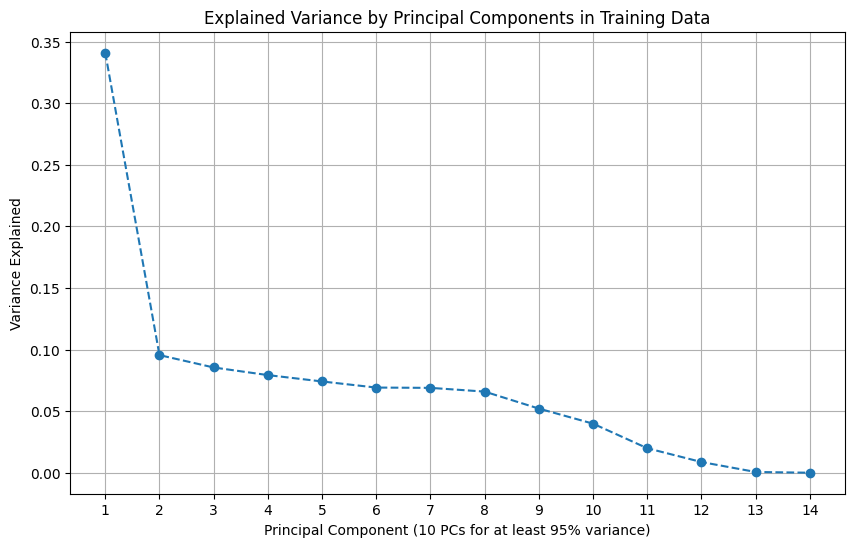

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

X = new_workout_recommendations.drop(columns=['Recommended Exercise', 'ID'])
y = new_workout_recommendations['Recommended Exercise']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.10, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)

# Standardize the data (must do for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
# We chose the number of PCs equal to the number of features
# We can use the visual to narrow down our number (it's likely we want at least 95% variance explained)
pca = PCA(n_components=X.shape[1])
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the explained variance for each PC
explained_variance_train = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance_train = pca.explained_variance_ratio_.cumsum()

# Find the number of components that retain at least 95% variance
n_components_95_train = (cumulative_variance_train >= 0.95).argmax() + 1

# Visual
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_train) + 1), explained_variance_train, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components in Training Data')
plt.xlabel(f'Principal Component ({n_components_95_train} PCs for at least 95% variance)')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_train) + 1))
plt.grid()
plt.show()

In [ ]:
# Apply PCA to the training data
# I am assuming we will just decide to do PCA by retaining at least 95% of variance
# Still good to have a visual
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the dev and test data using the same PCA transformation (and scaling)
X_dev_scaled = scaler.transform(X_dev)
X_dev_pca = pca.transform(X_dev_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
num_components = pca.n_components_
print(num_components)

10


# Decision Tree


## PCA

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

# Initialize decision tree
tree_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Fit to training data
tree_clf.fit(X_train_pca, y_train)

# Training data metrics
y_train_pred = tree_clf.predict(X_train_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')

print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Training Set Precision: {train_precision:.4f}")

# Testing data metrics
y_test_pred = tree_clf.predict(X_test_pca)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')

print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Precision: {test_precision:.4f}")


Training Set Accuracy: 0.9669
Training Set Precision: 0.9793
Test Set Accuracy: 0.9318
Test Set Precision: 0.9517


## Not PCA

In [ ]:
# Same process as above, with feature engineering data

tree_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

tree_clf.fit(X_train_no_pca, y_train_no_pca)

y_train_pred = tree_clf.predict(X_train_no_pca)

train_accuracy = accuracy_score(y_train_no_pca, y_train_pred)
train_precision = precision_score(y_train_no_pca, y_train_pred, average='weighted')

print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Training Set Precision: {train_precision:.4f}")

y_test_pred = tree_clf.predict(X_test_no_pca)

test_accuracy = accuracy_score(y_test_no_pca, y_test_pred)
test_precision = precision_score(y_test_no_pca, y_test_pred, average='weighted')

print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Precision: {test_precision:.4f}")

Training Set Accuracy: 0.9669
Training Set Precision: 0.9793
Test Set Accuracy: 0.9428
Test Set Precision: 0.9626


# Neural Net

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score

tf.random.set_seed(0)

## PCA

In [ ]:
# Class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [ ]:
# One-hot encoding of y
y_train_encoded = to_categorical(y_train)
y_dev_encoded = to_categorical(y_dev)
y_test_encoded = to_categorical(y_test)

In [ ]:
# Define
nn_model_pca = Sequential([
    # First layer
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    # Second layer
    Dense(64, activation='relu'),
    Dropout(0.3),
    # Output
    Dense(y_train_encoded.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Create model
nn_model_pca.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Train
history = nn_model_pca.fit(
    X_train_pca, y_train_encoded,
    validation_data=(X_dev_pca, y_dev_encoded),
    # Large for early stopping
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1,
    class_weight=class_weight_dict,
)

Epoch 1/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7409 - loss: 0.8017 - val_accuracy: 0.9641 - val_loss: 0.0680
Epoch 2/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9607 - loss: 0.1588 - val_accuracy: 0.9643 - val_loss: 0.0655
Epoch 3/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9631 - loss: 0.1462 - val_accuracy: 0.9643 - val_loss: 0.0640
Epoch 4/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9633 - loss: 0.1418 - val_accuracy: 0.9643 - val_loss: 0.0648
Epoch 5/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9643 - loss: 0.1393 - val_accuracy: 0.9644 - val_loss: 0.0638
Epoch 6/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9639 - loss: 0.1385 - val_accuracy: 0.9644 - val_loss: 0.0640
Epoch 7/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9637 - loss: 0.1381 - val_accuracy: 0.9645 - val_loss: 0.0644
Epoch 8/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9652 - lo

In [ ]:
# Evaluate on test - accuracy
test_loss, test_accuracy = nn_model_pca.evaluate(X_test_pca, y_test_encoded, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9672 - loss: 0.0716
Test Accuracy: 0.9628


In [ ]:
# Evaluate on test - precision
y_test_pred_probs = nn_model_pca.predict(X_test_pca)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
overall_precision = precision_score(y_test, y_test_pred, average = 'weighted')
print(f"Overall Precision: {overall_precision:.4f}")

Overall Precision: 0.9727


In [ ]:
# Evaluate on train
train_loss, train_accuracy = nn_model_pca.evaluate(X_train_pca, y_train_encoded, verbose=1)
print(f"Train Accuracy: {train_accuracy:.4f}")

y_train_pred_probs = nn_model_pca.predict(X_train_pca)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)
overall_precision = precision_score(y_train, y_train_pred, average = 'weighted')
print(f"Overall Precision: {overall_precision:.4f}")

2722/2722 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9634 - loss: 0.0659
Train Accuracy: 0.9651
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Overall Precision: 0.9769


## Not PCA

In [ ]:
# Class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_no_pca),
    y=y_train
)

class_weight_dict = dict(zip(np.unique(y_train_no_pca), class_weights))

In [ ]:
# One-hot encoding of y
y_train_encoded = to_categorical(y_train_no_pca)
y_dev_encoded = to_categorical(y_dev_no_pca)
y_test_encoded = to_categorical(y_test_no_pca)

In [ ]:
# Define
nn_model = Sequential([
    # First layer
    Dense(128, activation='relu', input_shape=(X_train_no_pca.shape[1],)),
    Dropout(0.3),
    # Second layer
    Dense(64, activation='relu'),
    Dropout(0.3),
    # Output
    Dense(y_train_encoded.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Create model
nn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Train
history = nn_model.fit(
    X_train_no_pca, y_train_encoded,
    validation_data=(X_dev_no_pca, y_dev_encoded),
    # Large for early stopping
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1195 - loss: 3.6125 - val_accuracy: 0.5751 - val_loss: 1.0790
Epoch 2/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5863 - loss: 1.0236 - val_accuracy: 0.9478 - val_loss: 0.1576
Epoch 3/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8950 - loss: 0.2990 - val_accuracy: 0.9673 - val_loss: 0.0892
Epoch 4/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9295 - loss: 0.1930 - val_accuracy: 0.9678 - val_loss: 0.0699
Epoch 5/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9378 - loss: 0.1633 - val_accuracy: 0.9678 - val_loss: 0.0634
Epoch 6/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9378 - loss: 0.1580 - val_accuracy: 0.9678 - val_loss: 0.0626
Epoch 7/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9440 - loss: 0.1320 - val_accuracy: 0.9678 - val_loss: 0.0571
Epoch 8/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9464 - loss

In [ ]:
# Evaluate on test - accuracy
test_loss, test_accuracy = nn_model.evaluate(X_test_no_pca, y_test_encoded, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9648 - loss: 0.0620
Test Accuracy: 0.9656


In [ ]:
# Evaluate on test - precision

y_test_pred_probs = nn_model.predict(X_test_no_pca)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
overall_precision = precision_score(y_test_no_pca, y_test_pred, average = 'weighted')
print(f"Overall Precision: {overall_precision:.4f}")

Overall Precision: 0.9429


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate on train
train_loss, train_accuracy = nn_model.evaluate(X_train_no_pca, y_train_encoded, verbose=1)
print(f"Train Accuracy: {train_accuracy:.4f}")

y_train_pred_probs = nn_model.predict(X_train_no_pca)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)
overall_precision = precision_score(y_train_no_pca, y_train_pred, average = 'weighted')
print(f"Overall Precision: {overall_precision:.4f}")

2722/2722 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9641 - loss: 0.0603
Train Accuracy: 0.9648
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Overall Precision: 0.9461


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SVM

## PCA

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# Train RBF kernel
svm_model = SVC(class_weight = 'balanced', kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_pca, y_train)

SVC(class_weight='balanced')

In [ ]:
# Predictions
y_pred_train = svm_model.predict(X_train_pca)

# Evaluate
print("Train Set Evaluation:")
print(classification_report(y_train, y_pred_train))

In [ ]:
# Hyper-paramter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf', 'linear'],
    'class_weight': [None, 'balanced']
}

# Find best parameters
grid_search = GridSearchCV(estimator = svm_model, param_grid=param_grid, refit=True, verbose=2)
grid_search.fit(X_dev_pca, y_dev)

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   3.0s
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   3.7s
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   4.4s
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   2.8s
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   0.6s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   0.6s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   0.6s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   0.6s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=   2.1s
[CV] END ...C=0.1, class_weight=None, gamm

In [ ]:
# Evaluate - test
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_pca)
classification_report_test = classification_report(y_test, y_pred_best, output_dict=True)
print("Test accuracy:")
print(classification_report_test['accuracy'])
print("Test precision:")
print(classification_report_test['weighted avg']['precision'])

Test accuracy:
0.9669421487603306
Test precision:
0.9658610148367317


In [ ]:
# Evalute - train
y_pred_best = best_svm.predict(X_train_pca)
classification_report_train = classification_report(y_train, y_pred_best, output_dict=True)
print("Train accuracy:")
print(classification_report_train['accuracy'])
print("Train precision:")
print(classification_report_train['weighted avg']['precision'])

Train accuracy:
0.9636378249288142
Train precision:
0.9605219481316997


## Not PCA

In [ ]:
# Train RBF kernel
svm_model1 = SVC(class_weight = 'balanced', kernel='rbf', C=1.0, gamma='scale')
svm_model1.fit(X_train_no_pca, y_train_no_pca)

SVC(class_weight='balanced')

In [ ]:
# Predictions
y_pred_train = svm_model1.predict(X_train_no_pca)

# Evaluate
print("Train Set Evaluation:")
print(classification_report(y_train_no_pca, y_pred_train))

Train Set Evaluation:
              precision    recall  f1-score   support

           0       0.36      0.13      0.20      6310
           1       0.74      0.53      0.62      5285
           2       0.58      0.82      0.68      6322
           3       0.04      0.01      0.01      6310
           4       0.59      0.51      0.54      6252
           5       0.48      0.57      0.52      1509
           6       0.44      0.79      0.57      6331
           7       0.69      0.86      0.77      6340
           8       0.53      0.80      0.64      6316
           9       1.00      0.99      1.00      6283
          10       0.98      0.54      0.70      6306
          11       1.00      1.00      1.00      6815
          12       0.70      0.63      0.66      5267
          13       0.52      0.75      0.61      3814
          14       0.21      0.24      0.22      1531
          15       0.22      0.26      0.23      1530
          16       1.00      1.00      1.00      4575

    

In [ ]:
# Hyper-parameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf', 'linear'],
    'class_weight': [None, 'balanced']
}

# Find best parameters
grid_search = GridSearchCV(estimator = svm_model1, param_grid=param_grid, refit=True, verbose=2)
grid_search.fit(X_dev_no_pca, y_dev_no_pca)

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   3.8s
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   5.4s
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   3.8s
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   3.8s
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   9.1s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   9.8s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=  10.2s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   8.9s
[CV] END C=0.1, class_weight=None, gamma=scale, kernel=linear; total time=   7.8s
[CV] END ...C=0.1, class_weight=None, gamma=auto, kernel=rbf; total time=   5.3s
[CV] END ...C=0.1, class_weight=None, gamm

In [ ]:
# Evaluate - test
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_no_pca)
classification_report_test = classification_report(y_test_no_pca, y_pred_best, output_dict=True)
print("Test accuracy:")
print(classification_report_test['accuracy'])
print("Test precision:")
print(classification_report_test['weighted avg']['precision'])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00       104
           3       1.00      1.00      1.00        88
           4       1.00      1.00      1.00       107
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        97
           7       1.00      0.99      1.00       114
           8       1.00      1.00      1.00       100
           9       1.00      1.00      1.00       106
          10       1.00      1.00      1.00       114
          11       1.00      1.00      1.00       133
          12       0.75      0.86      0.81        96
          13       1.00      1.00      1.00        57
          14       0.50      0.23      0.31        31
          15       0.23      0.26      0.24        19
          16       1.00      1.00      1.00        70

    accuracy              

In [ ]:
# Evaluate - train
y_pred_best = best_svm.predict(X_train_no_pca)
classification_report_train = classification_report(y_train_no_pca, y_pred_best, output_dict=True)
print("Train accuracy:")
print(classification_report_train['accuracy'])
print("Train precision:")
print(classification_report_train['weighted avg']['precision'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6310
           1       1.00      1.00      1.00      5285
           2       1.00      1.00      1.00      6322
           3       1.00      1.00      1.00      6310
           4       1.00      1.00      1.00      6252
           5       1.00      1.00      1.00      1509
           6       1.00      1.00      1.00      6331
           7       1.00      1.00      1.00      6340
           8       1.00      1.00      1.00      6316
           9       1.00      1.00      1.00      6283
          10       1.00      1.00      1.00      6306
          11       1.00      1.00      1.00      6815
          12       0.73      0.87      0.79      5267
          13       1.00      1.00      1.00      3814
          14       0.32      0.19      0.24      1531
          15       0.33      0.24      0.28      1530
          16       1.00      1.00      1.00      4575

    accuracy              

#XGBoost

In [ ]:
# Import packages
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

## PCA

In [ ]:
# Create DMatrices
dtrain = xgb.DMatrix(X_train_pca, y_train)
ddev = xgb.DMatrix(X_dev_pca, y_dev)
dtest = xgb.DMatrix(X_test_pca)

In [ ]:
# Set parameters
params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_train)),
    'max_depth': 5,
    'eta': 0.1,
    'eval_metric': 'mlogloss',
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the model to determine number of boosting rounds
evals = [(dtrain, 'train'), (ddev, 'dev')]
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, verbose_eval=100, early_stopping_rounds=10)

[0]	train-mlogloss:2.30768	dev-mlogloss:2.30822
[100]	train-mlogloss:0.09029	dev-mlogloss:0.09835
[198]	train-mlogloss:0.06018	dev-mlogloss:0.07436


In [ ]:
# Tune max_depth, min_child_weight, gamma
param_grid1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,6)]
    }
grid_search1 = GridSearchCV(estimator = xgb.XGBClassifier(
                                            objective='multi:softmax',
                                            num_class=len(np.unique(y_train)),
                                            max_depth=5,
                                            eta=0.1,
                                            eval_metric='mlogloss',
                                            min_child_weight=1,
                                            gamma=0,
                                            subsample=0.8,
                                            colsample_bytree=0.8,
                                            n_estimators=200),
                           param_grid = param_grid1, cv = 5, scoring = 'accuracy')
grid_search1.fit(X_train_pca, y_train)
print(f"Best parameters found: {grid_search1.best_params_}")


Best parameters found: {'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 3}


In [ ]:
# Further tune max_depth and min_child_weight
param_grid1a = {
    'max_depth':[3,4],
    'min_child_weight':[2,3,4],
    }
grid_search1a = GridSearchCV(estimator = xgb.XGBClassifier(
                                            objective='multi:softmax',
                                            num_class=len(np.unique(y_train)),
                                            max_depth=5,
                                            eta=0.1,
                                            eval_metric='mlogloss',
                                            min_child_weight=1,
                                            gamma=0.1,
                                            subsample=0.8,
                                            colsample_bytree=0.8,
                                            n_estimators=200),
                           param_grid = param_grid1a, cv = 5, scoring = 'accuracy')
grid_search1a.fit(X_train_pca, y_train)
print(f"Best parameters found: {grid_search1a.best_params_}")

Best parameters found: {'max_depth': 4, 'min_child_weight': 3}


In [ ]:
# Tune subsample and colsample_bytree
param_grid2 = {
    'subsample':[i/10.0 for i in range(6,11,2)],
    'colsample_bytree':[i/10.0 for i in range(6,11,2)]
    }
grid_search2 = GridSearchCV(estimator = xgb.XGBClassifier(
                                            objective='multi:softmax',
                                            num_class=len(np.unique(y_train)),
                                            max_depth=4,
                                            eta=0.1,
                                            eval_metric='mlogloss',
                                            min_child_weight=3,
                                            gamma=0.1,
                                            subsample=0.8,
                                            colsample_bytree=0.8,
                                            n_estimators=200),
                           param_grid = param_grid2, cv = 5, scoring = 'accuracy')
grid_search2.fit(X_train_pca, y_train)
print(f"Best parameters found: {grid_search2.best_params_}")

Best parameters found: {'colsample_bytree': 1.0, 'subsample': 1.0}


In [ ]:
# Further tune subsample and colsample_bytree
param_grid2a = {
    'subsample':[i/10.0 for i in range(9,11)],
    'colsample_bytree':[i/10.0 for i in range(9,11)]
    }
grid_search2a = GridSearchCV(estimator = xgb.XGBClassifier(
                                            objective='multi:softmax',
                                            num_class=len(np.unique(y_train)),
                                            max_depth=4,
                                            eta=0.1,
                                            eval_metric='mlogloss',
                                            min_child_weight=3,
                                            gamma=0.1,
                                            subsample=0.8,
                                            colsample_bytree=0.8,
                                            n_estimators=200),
                           param_grid = param_grid2a, cv = 5, scoring = 'accuracy')
grid_search2a.fit(X_train_pca, y_train)
print(f"Best parameters found: {grid_search2a.best_params_}")

Best parameters found: {'colsample_bytree': 0.9, 'subsample': 1.0}


In [ ]:
# Set parameters
opt_params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_train)),
    'max_depth': 4,
    'eta': 0.1,
    'eval_metric': 'mlogloss',
    'min_child_weight': 3,
    'gamma': 0.1,
    'subsample': 1,
    'colsample_bytree': 0.9
}

# Train the model and predict
best_model = xgb.train(opt_params, dtrain, num_boost_round=200)
y_train_pred = best_model.predict(dtrain)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Precision:", precision_score(y_train, y_train_pred, average='weighted'))

y_pred = best_model.predict(dtest)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred, average='weighted'))

Train Accuracy: 0.9658996968861946
Train Precision: 0.9714071957338887
Test Accuracy: 0.9504132231404959
Test Precision: 0.9613940778760739


## Not PCA

In [ ]:
# Create DMatrices
dtrain_no_pca = xgb.DMatrix(X_train_no_pca, y_train_no_pca)
ddev_no_pca = xgb.DMatrix(X_dev_no_pca, y_dev_no_pca)
dtest_no_pca = xgb.DMatrix(X_test_no_pca)

In [ ]:
# Train the model to determine number of boosting rounds
evals_no_pca = [(dtrain_no_pca, 'train'), (ddev_no_pca, 'dev')]
model_no_pca = xgb.train(params, dtrain_no_pca, num_boost_round=1000, evals=evals_no_pca, verbose_eval=100, early_stopping_rounds=10)

[0]	train-mlogloss:2.18965	dev-mlogloss:2.19194
[100]	train-mlogloss:0.05807	dev-mlogloss:0.05963
[109]	train-mlogloss:0.05777	dev-mlogloss:0.06005


In [ ]:
# Tune max_depth, min_child_weight, and gamma
param_grid1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,6)],
    }
grid_search1 = GridSearchCV(estimator = xgb.XGBClassifier(
                                            objective='multi:softmax',
                                            num_class=len(np.unique(y_train)),
                                            max_depth=5,
                                            eta=0.1,
                                            eval_metric='mlogloss',
                                            min_child_weight=1,
                                            gamma=0,
                                            subsample=0.8,
                                            colsample_bytree=0.8,
                                            n_estimators=110),
                           param_grid = param_grid1, cv = 5, scoring = 'accuracy')
grid_search1.fit(X_train_no_pca, y_train_no_pca)
print(f"Best parameters found: {grid_search1.best_params_}")

Best parameters found: {'gamma': 0.4, 'max_depth': 3, 'min_child_weight': 5}


In [ ]:
# Further tune max_depth and min_child_weight
param_grid1a = {
    'max_depth':[3,4],
    'min_child_weight':[4,5,6]
    }
grid_search1a = GridSearchCV(estimator = xgb.XGBClassifier(
                                            objective='multi:softmax',
                                            num_class=len(np.unique(y_train)),
                                            max_depth=5,
                                            eta=0.1,
                                            eval_metric='mlogloss',
                                            min_child_weight=1,
                                            gamma=0.4,
                                            subsample=0.8,
                                            colsample_bytree=0.8,
                                            n_estimators=110),
                           param_grid = param_grid1a, cv = 5, scoring = 'accuracy')
grid_search1a.fit(X_train_no_pca, y_train_no_pca)
print(f"Best parameters found: {grid_search1a.best_params_}")

Best parameters found: {'max_depth': 3, 'min_child_weight': 5}


In [ ]:
# Tune subsample and colsample_bytree
param_grid2 = {
    'subsample':[i/10.0 for i in range(6,11,2)],
    'colsample_bytree':[i/10.0 for i in range(6,11,2)]
    }
grid_search2 = GridSearchCV(estimator = xgb.XGBClassifier(
                                            objective='multi:softmax',
                                            num_class=len(np.unique(y_train)),
                                            max_depth=3,
                                            eta=0.1,
                                            eval_metric='mlogloss',
                                            min_child_weight=5,
                                            gamma=0.4,
                                            subsample=0.8,
                                            colsample_bytree=0.8,
                                            n_estimators=110),
                           param_grid = param_grid2, cv = 5, scoring = 'accuracy')
grid_search2.fit(X_train_no_pca, y_train_no_pca)
print(f"Best parameters found: {grid_search2.best_params_}")

Best parameters found: {'colsample_bytree': 0.8, 'subsample': 1.0}


In [ ]:
# Further tune subsample and colsample_bytree
param_grid2a = {
    'subsample':[i/10.0 for i in range(9,11)],
    'colsample_bytree':[i/10.0 for i in range(7,10)]
    }
grid_search2a = GridSearchCV(estimator = xgb.XGBClassifier(
                                            objective='multi:softmax',
                                            num_class=len(np.unique(y_train)),
                                            max_depth=3,
                                            eta=0.1,
                                            eval_metric='mlogloss',
                                            min_child_weight=5,
                                            gamma=0.4,
                                            subsample=0.8,
                                            colsample_bytree=0.8,
                                            n_estimators=110),
                           param_grid = param_grid2a, cv = 5, scoring = 'accuracy')
grid_search2a.fit(X_train_no_pca, y_train_no_pca)
print(f"Best parameters found: {grid_search2a.best_params_}")

Best parameters found: {'colsample_bytree': 0.7, 'subsample': 1.0}


In [ ]:
# Set parameters
opt_params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_train)),
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'mlogloss',
    'min_child_weight': 5,
    'gamma': 0.4,
    'subsample': 1,
    'colsample_bytree': 0.7
}

# Train the model and predict
best_model_no_pca = xgb.train(opt_params, dtrain_no_pca, num_boost_round=110)
y_train_no_pca_pred = best_model_no_pca.predict(dtrain_no_pca)
print("Train Accuracy:", accuracy_score(y_train_no_pca, y_train_no_pca_pred))
print("Train Precision:", precision_score(y_train_no_pca, y_train_no_pca_pred, average='weighted'))

y_pred_no_pca = best_model_no_pca.predict(dtest_no_pca)
print("Test Accuracy:", accuracy_score(y_test_no_pca, y_pred_no_pca))
print("Test Precision:", precision_score(y_test_no_pca, y_pred_no_pca, average='weighted'))

Train Accuracy: 0.9654174703775145
Train Precision: 0.9767907757401133
Test Accuracy: 0.9573002754820936
Test Precision: 0.9740331294050302


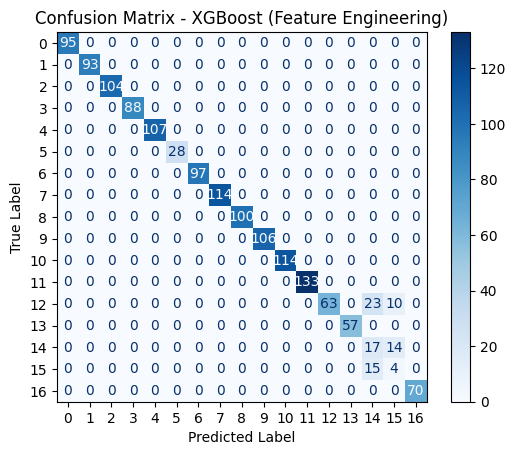

In [ ]:
# Confusion matrix visual
# used for feature engineering results with each model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix_xg = confusion_matrix(y_test_no_pca, y_pred_no_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xg)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost (Feature Engineering)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Naive Bayes

## PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Class priors (to correct for class imbalance)
class_distribution = np.bincount(y_train) / len(y_train)

# Hyperparameter tuning
param_grid_nb = {
    'var_smoothing': np.logspace(-9, 2, 12)
}

# Find best parameters with CV
grid_search_nb = GridSearchCV(GaussianNB(priors=class_distribution), param_grid_nb, scoring = "accuracy", refit=True, verbose=2, cv=5)

# Fit to training data
grid_search_nb.fit(X_train_pca, y_train)

# Evaluate
best_nb = grid_search_nb.best_estimator_

# Training and testing metrics
y_pred_test = best_nb.predict(X_test_pca)
y_pred_train = best_nb.predict(X_train_pca)

classification_report_test = classification_report(y_test, y_pred_test, output_dict=True)
classification_report_train = classification_report(y_train, y_pred_train, output_dict=True)
print("Train accuracy:")
print(classification_report_train['accuracy'])
print("Train precision:")
print(classification_report_train['weighted avg']['precision'])
print("Test accuracy:")
print(classification_report_test['accuracy'])
print("Test precision:")
print(classification_report_test['weighted avg']['precision'])



{'priors': array([0.07244879, 0.06068017, 0.07258657, 0.07244879, 0.07178286,
       0.01732571, 0.07268991, 0.07279324, 0.07251768, 0.07213879,
       0.07240287, 0.07824699, 0.0604735 , 0.04379076, 0.0175783 ,
       0.01756682, 0.05252824]), 'var_smoothing': 1e-09}
Initial Dev Set Evaluation (Default Naive Bayes):
Accuracy:
0.6478239727692682
Precision:
0.6671210125628776
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-08; total time=   0.1s
[CV] END ................................var_smoothing=1e-08; total time=  

## Not PCA

In [ ]:
# Same process as above with feature engineering data
param_grid_nb = {
    'var_smoothing': np.logspace(-9, 2, 12)
}


grid_search_nb = GridSearchCV(GaussianNB(priors=class_distribution), param_grid_nb, scoring = "accuracy", refit=True, verbose=2, cv=5)
grid_search_nb.fit(X_train_no_pca, y_train_no_pca)

best_nb = grid_search_nb.best_estimator_
y_pred_test = best_nb.predict(X_test_no_pca)
y_pred_train = best_nb.predict(X_train_no_pca)

classification_report_test = classification_report(y_test_no_pca, y_pred_test, output_dict=True)
classification_report_train = classification_report(y_train_no_pca, y_pred_train, output_dict=True)
print("Train accuracy:")
print(classification_report_train['accuracy'])
print("Train precision:")
print(classification_report_train['weighted avg']['precision'])
print("Test accuracy:")
print(classification_report_test['accuracy'])
print("Test precision:")
print(classification_report_test['weighted avg']['precision'])

{'priors': array([0.07244879, 0.06068017, 0.07258657, 0.07244879, 0.07178286,
       0.01732571, 0.07268991, 0.07279324, 0.07251768, 0.07213879,
       0.07240287, 0.07824699, 0.0604735 , 0.04379076, 0.0175783 ,
       0.01756682, 0.05252824]), 'var_smoothing': 1e-09}
Initial Dev Set Evaluation (Default Naive Bayes):
Accuracy:
0.9645027960126429
Precision:
0.979143023155188
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-09; total time=   0.2s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-09; total time=   0.1s
[CV] END ................................var_smoothing=1e-08; total time=   0.1s
[CV] END ................................var_smoothing=1e-08; total time=   

# Model Output

In [ ]:
#train model with no-transformation

In [ ]:
#class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [ ]:
#one-hot encoding of y
y_train_encoded = to_categorical(y_train)
y_dev_encoded = to_categorical(y_dev)
y_test_encoded = to_categorical(y_test)

In [ ]:
#define
nn_model_ = Sequential([
    #first layer
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    #second layer
    Dense(64, activation='relu'),
    Dropout(0.3),
    #output
    Dense(y_train_encoded.shape[1], activation='softmax')
])

In [ ]:
#create model
nn_model_.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
#Train
history = nn_model_.fit(
    X_train, y_train_encoded,
    validation_data=(X_dev, y_dev_encoded),
    #large for early stopping
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1,
    class_weight=class_weight_dict,
)

Epoch 1/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5320 - loss: 1.2372 - val_accuracy: 0.9673 - val_loss: 0.1266
Epoch 2/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8740 - loss: 0.4057 - val_accuracy: 0.9534 - val_loss: 0.1071
Epoch 3/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9128 - loss: 0.2984 - val_accuracy: 0.9656 - val_loss: 0.0676
Epoch 4/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9268 - loss: 0.2502 - val_accuracy: 0.9660 - val_loss: 0.0679
Epoch 5/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9335 - loss: 0.2338 - val_accuracy: 0.9610 - val_loss: 0.0801
Epoch 6/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9405 - loss: 0.2116 - val_accuracy: 0.9645 - val_loss: 0.0654
Epoch 7/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9408 - loss: 0.2108 - val_accuracy: 0.9661 - val_loss: 0.0631
Epoch 8/100
2722/2722 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9437 - lo

In [ ]:
#evaluate on test - accuracy (just to make sure it is high)
test_loss, test_accuracy = nn_model_.evaluate(X_test, y_test_encoded, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9540 - loss: 0.0739
Test Accuracy: 0.9552


In [ ]:
#evaluate on test - precision (just to make sure it is high)
y_test_pred_probs = nn_model_.predict(X_test)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
overall_precision = precision_score(y_test, y_test_pred, average = 'weighted')
print(f"Overall Precision: {overall_precision:.4f}")


Overall Precision: 0.9679


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#define a function that will pre-process data and output a recommendation
def predict_exercise(user_input):
    user_input_df = pd.DataFrame([user_input])

    #encode
    for col in categorical_cols:
        user_input_df[col] = encoders[col].transform([user_input[col]])[0]

    #nn prediction (using simplified nn model)
    prediction_encoded = nn_model_.predict(user_input_df)
    pred_max = np.argmax(prediction_encoded, axis=1)

    #decode
    prediction = target_encoder.inverse_transform(pred_max)

    return prediction


EXAMPLE 1

In [ ]:
#example 1
user_input = {
    "Sex": "Male",
    "Age": 25,
    "Hypertension": "No",
    "Diabetes": "No",
    "BMI": 22,
    "Level": "Normal",
    "Fitness Goal": "Weight Loss",
    "Fitness Type": "Cardio Fitness",
    "Equipment": "Body Only",
    "Type": "Cardio",
    "BodyPart": "Quadriceps",
    "Workout Intensity Level": "Intermediate",
    "Height_in_inches": 75,
    "Weight_in_pounds":160
}


In [ ]:
prediction = predict_exercise(user_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
print(f"The recommended exercise for the given user profile is: {prediction[0]}")


The recommended exercise for the given user profile is: Trail Running/Walking


EXAMPLE 2

In [ ]:
#example 2
user_input = {
    "Sex": "Female",
    "Age": 45,
    "Hypertension": "No",
    "Diabetes": "Yes",
    "BMI": 20,
    "Level": "Normal",
    "Fitness Goal": "Weight Gain",
    "Fitness Type": "Muscular Fitness",
    "Equipment": "Barbell",
    "Type": "Strength",
    "BodyPart": "Chest",
    "Workout Intensity Level": "Beginner",
    "Height_in_inches": 65,
    "Weight_in_pounds":150
}

In [ ]:
prediction = predict_exercise(user_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
print(f"The recommended exercise for the given user profile is: {prediction[0]}")


The recommended exercise for the given user profile is: Jefferson Squats


In [ ]:
#easy way to check values (for example inputs)

In [ ]:
for col, le in encoders.items():
    print(f"Classes for {col}: {le.classes_}")

Classes for Sex: ['Female' 'Male']
Classes for Hypertension: ['No' 'Yes']
Classes for Diabetes: ['No' 'Yes']
Classes for Level: ['Normal' 'Obese' 'Overweight' 'Underweight']
Classes for Fitness Goal: ['Weight Gain' 'Weight Loss']
Classes for Fitness Type: ['Cardio Fitness' 'Muscular Fitness']
Classes for Equipment: ['Bands' 'Barbell' 'Body Only' 'Cable' 'Kettlebells' 'Machine' 'Other' nan]
Classes for Type: ['Cardio' 'Strength' 'Stretching']
Classes for BodyPart: ['Chest' 'Lower Back' 'Quadriceps']
Classes for Workout Intensity Level: ['Beginner' 'Intermediate']
